# Import Required libraries



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Loading dataset

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
pd.DataFrame({"Features_names" : dataset.columns, "No.of Null values" : dataset.isnull().sum() , "% of null values" : (dataset.isnull().sum()/len(dataset))*100} )

,Features_names,No.of Null values,% of null values
Item_Identifier,Item_Identifier,0,0.000000
Item_Weight,Item_Weight,1463,17.165317
Item_Fat_Content,Item_Fat_Content,0,0.000000
Item_Visibility,Item_Visibility,0,0.000000
Item_Type,Item_Type,0,0.000000
Item_MRP,Item_MRP,0,0.000000
Outlet_Identifier,Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,Outlet_Establishment_Year,0,0.000000
Outlet_Size,Outlet_Size,2410,28.276428
Outlet_Location_Type,Outlet_Location_Type,0,0.000000


In [7]:
dataset["Item_Weight"] = dataset["Item_Weight"].fillna(dataset["Item_Weight"].median())

In [8]:
dataset.drop(["Outlet_Size"] , inplace = True , axis = 1)

In [9]:
pd.DataFrame({"Features_names" : dataset.columns, "No.of Null values" : dataset.isnull().sum() , "% of null values" : (dataset.isnull().sum()/len(dataset))*100} )

,Features_names,No.of Null values,% of null values
Item_Identifier,Item_Identifier,0,0.0
Item_Weight,Item_Weight,0,0.0
Item_Fat_Content,Item_Fat_Content,0,0.0
Item_Visibility,Item_Visibility,0,0.0
Item_Type,Item_Type,0,0.0
Item_MRP,Item_MRP,0,0.0
Outlet_Identifier,Outlet_Identifier,0,0.0
Outlet_Establishment_Year,Outlet_Establishment_Year,0,0.0
Outlet_Location_Type,Outlet_Location_Type,0,0.0
Outlet_Type,Outlet_Type,0,0.0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [11]:
dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
dataset["Item_Fat_Content"][ dataset["Item_Fat_Content"] == "low fat"] = "Low Fat"
dataset["Item_Fat_Content"][ dataset["Item_Fat_Content"] == "LF"] = "Low Fat"
dataset["Item_Fat_Content"][ dataset["Item_Fat_Content"] == "reg"] = "Low Fat"

In [13]:
dataset["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
dataset["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
dataset["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [16]:
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


# Analysing Numericall Variables

<function matplotlib.pyplot.show(close=None, block=None)>

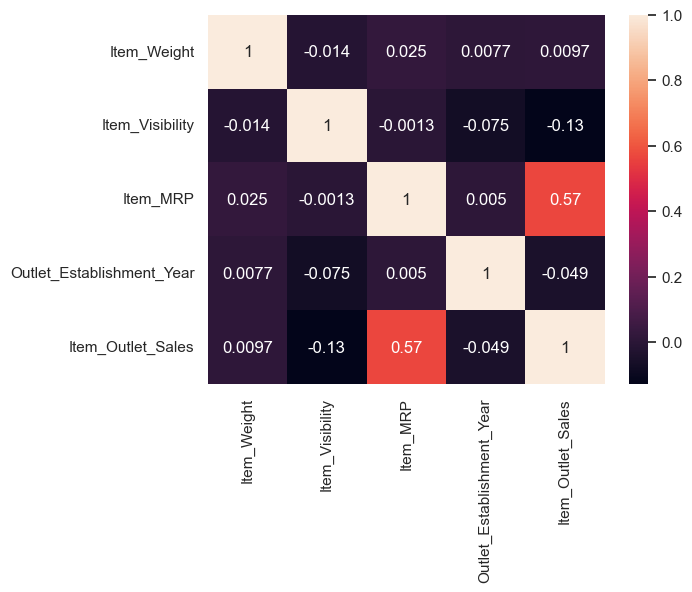

In [17]:
sns.heatmap(dataset.select_dtypes(exclude='object').corr() , annot=True)
plt.show

# Analysis of Catogorical Varibale

In [18]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [19]:
dataset["Item_Fat_Content"] = dataset["Item_Fat_Content"].astype('category').cat.codes

model = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=dataset).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                        sum_sq      df        F    PR(>F)
Item_Fat_Content  1.269595e+07     1.0  4.36138  0.036792
Residual          2.480457e+10  8521.0      NaN       NaN


In [20]:

dataset["Item_Type"] = dataset["Item_Type"].astype('category').cat.codes


model = ols('Item_Outlet_Sales ~ Item_Type', data=dataset).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq      df         F    PR(>F)
Item_Type  7.212469e+06     1.0  2.477119  0.115551
Residual   2.481005e+10  8521.0       NaN       NaN


In [21]:
dataset['Outlet_Location_Type'] = dataset['Outlet_Location_Type'].str.extract(r'(\d+)').astype('int')

model = ols('Item_Outlet_Sales ~ Outlet_Location_Type', data=dataset).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df          F        PR(>F)
Outlet_Location_Type  1.982010e+08     1.0  68.600115  1.389024e-16
Residual              2.461906e+10  8521.0        NaN           NaN


In [22]:
dataset["Outlet_Type"] = dataset["Outlet_Type"].astype('category').cat.codes

model = ols('Item_Outlet_Sales ~ Outlet_Type', data=dataset).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq      df            F  PR(>F)
Outlet_Type  4.001047e+09     1.0  1637.805921     0.0
Residual     2.081622e+10  8521.0          NaN     NaN


In [23]:
x = dataset[["Item_MRP" , "Item_Fat_Content" , "Outlet_Type"]]

y = dataset["Item_Outlet_Sales"]

In [24]:
x

,Item_MRP,Item_Fat_Content,Outlet_Type
0,249.8092,0,1
1,48.2692,1,2
2,141.6180,0,1
3,182.0950,1,0
4,53.8614,0,1
...,...,...,...
8518,214.5218,0,1
8519,108.1570,1,1
8520,85.1224,0,1
8521,103.1332,1,2


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = pd.DataFrame(sc.fit_transform(x) , columns = x.columns)
sc_x 

,Item_MRP,Item_Fat_Content,Outlet_Type
0,1.747454,-0.716086,-0.252658
1,-1.489023,1.396480,1.002972
2,0.010040,-0.716086,-0.252658
3,0.660050,1.396480,-1.508289
4,-1.399220,-0.716086,-0.252658
...,...,...,...
8518,1.180783,-0.716086,-0.252658
8519,-0.527301,1.396480,-0.252658
8520,-0.897208,-0.716086,-0.252658
8521,-0.607977,1.396480,1.002972


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
 
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['columns'] = x.columns

vif

,vif,columns
0,2.603242,Item_MRP
1,1.431814,Item_Fat_Content
2,2.435654,Outlet_Type


# Model - 1 : OLS

In [27]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

ols = smf.OLS(y , exog = x).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                          1.053e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                        0.00
Time:                        16:57:01   Log-Likelihood:                         -73050.
No. Observations:                8523   AIC:                                  1.461e+05
Df Residuals:                    8520   BIC:                                  1.461e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Item_MRP            11.2015      0.145     77.371      0.000      10.918      11.485
Item_Fat_Content  -117.5946     28.425     -4.137      0.000    -173.315     -61.875
Outlet_Type        634.4758     14.976     42.365      0.000     605.119     663.833
==============================================================================
Omnibus:                     1510.624   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3165.975
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       5.123   Cond. No.                         318.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model - 2 : Linear Regression

In [28]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=43)

In [29]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(x_train , y_train)


LinearRegression()

In [30]:
lr.coef_

array([ 15.72722375,  76.12453619, 852.62162852])

In [31]:
from sklearn.metrics import r2_score , mean_squared_error

lr_predict_train = lr.predict(x_train)
lr_predict_test = lr.predict(x_test)


print("train :" , r2_score(y_train , lr_predict_train))
print()
print("Test : " , r2_score(y_test ,lr_predict_test))



print("Test : " , mean_squared_error(y_test ,lr_predict_test))

train : 0.4864401787381698

Test :  0.47509046597295734
Test :  1470843.3008328518


# Regularization L2

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)

ridge.fit(x_train , y_train)

Ridge(alpha=0.1)

In [33]:
ridge.coef_

array([ 15.72722239,  76.11983907, 852.6022625 ])

In [34]:
y_pred_ridge_train=ridge.predict(x_train)
y_pred_ridge_test= ridge.predict(x_test)

print("ridge Train :" , r2_score(y_train , y_pred_ridge_train))
print("ridge Test :" , r2_score(y_test , y_pred_ridge_test))

ridge Train : 0.48644017865395617
ridge Test : 0.4750900994908678


# Regularization L1

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
print("Lasso Regularization", lasso.coef_)

y_pred_lasso_train= lasso.predict(x_train)
y_pred_lasso_test= lasso.predict(x_test)

print("Lasso Train :" , r2_score(y_train , y_pred_lasso_train))
print("Lasso Test :" , r2_score(y_test , y_pred_lasso_test))


Lasso Regularization [ 15.72722113  75.68040067 852.46884484]
Lasso Train : 0.4864401584211898
Lasso Test : 0.4750934977297877


# Xgboost 

In [36]:


from xgboost import XGBRegressor

xgboost = XGBRegressor()

xgboost.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred_xgboost_train= xgboost.predict(x_train)
y_pred_xgboost_test= xgboost.predict(x_test)

print("xgboost Train :" , r2_score(y_train , y_pred_xgboost_train))
print("xgboost Test :" , r2_score(y_test , y_pred_xgboost_test))


xgboost Train : 0.6745151654596737
xgboost Test : 0.5530422332667664


# Model SGDRegression

In [38]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(x_train , y_train)



SGDRegressor()

In [39]:
y_pred_sgd_train= sgd.predict(x_train)
y_pred_sgd_test= sgd.predict(x_test)

print("sgd Train :" , r2_score(y_train , y_pred_sgd_train))
print("sgd Test :" , r2_score(y_test , y_pred_sgd_test))

sgd Train : -622375756197692.4
sgd Test : -652412554235522.9


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor()
random.fit(x_train , y_train)

RandomForestRegressor()

In [41]:
random.feature_importances_

array([0.69695817, 0.02422268, 0.27881916])

In [42]:
y_pred_random_train= random.predict(x_train)
y_pred_random_test= random.predict(x_test)

print("random Train :" , r2_score(y_train , y_pred_random_train))
print("random Test :" , r2_score(y_test , y_pred_random_test))

random Train : 0.9025823996064347
random Test : 0.4448856150729463


# Descision Tress

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)


DecisionTreeRegressor()

In [44]:
y_pred_dt_train= dt.predict(x_train)
y_pred_dt_test= dt.predict(x_test)

print("dt Train :" , r2_score(y_train , y_pred_dt_train))
print("dt Test :" , r2_score(y_test , y_pred_dt_test))

dt Train : 0.9701653375588636
dt Test : 0.1896881771939971


In [45]:
from sklearn.metrics import root_mean_squared_error
print("dt Train :" , root_mean_squared_error(y_train , y_pred_dt_train))
print("dt Test :" , root_mean_squared_error(y_test , y_pred_dt_test))


dt Train : 296.06474238226
dt Test : 1506.839723595574


# XGBootRegressor

In [68]:
from xgboost import XGBRegressor

xgboost = XGBRegressor()

xgboost.fit(x_train , y_train)

y_pred_xgboost_train= xgboost.predict(x_train)
y_pred_xgboost_test= xgboost.predict(x_test)

print("xgboost Train :" , r2_score(y_train , y_pred_xgboost_train))
print("xgboost Test :" , r2_score(y_test , y_pred_xgboost_test))

xgboost Train : 0.6745151654596737
xgboost Test : 0.5530422332667664


# GradientBoostingRegression

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred_gbr_train= gbr.predict(x_train)
y_pred_gbr_test= gbr.predict(x_test)

print("gbr Train :" , r2_score(y_train , y_pred_gbr_train))
print("gbr Test :" , r2_score(y_test , y_pred_gbr_test))

gbr Train : 0.6244140072348784
gbr Test : 0.614101126078942


# K-Fold Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

training_Accuracy = cross_val_score(random , x_train , y_train, cv =10)

print("training_Accuracy for all 10 values cv : " , training_Accuracy)

print()
print("Training accuracy mean values :" , training_Accuracy.mean())
print()
print("Training accuracy Max value :" , training_Accuracy.max())


training_Accuracy for all 10 values cv :  [0.51820913 0.43519283 0.40361165 0.40906561 0.4329648  0.41609547
 0.40152217 0.46283937 0.40046553 0.41946377]

Training accuracy mean values : 0.42994303368235454

Training accuracy Max value : 0.518209126604628


# Bagging

In [47]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(
        estimator=random,
        n_estimators=50,
        oob_score=True,
        
)
bag.fit(x_train,y_train)
y_pred_bag_train= bag.predict(x_train)
y_pred_bag_test= bag.predict(x_test)

print("bag Train :" , r2_score(y_train , y_pred_bag_train))
print("bag Test :" , r2_score(y_test , y_pred_bag_test))







bag Train : 0.8134411111621549
bag Test : 0.5239144188852964


# Voting Regressor 

In [48]:
from sklearn.ensemble import VotingRegressor



vr = VotingRegressor(
    estimators=[ ("Gradientboosting" , gbr) , ("Random" , random) ,  ("xgboost" , xgboost) ]

)
vr.fit(x_train, y_train)

y_pred_vr_train= vr.predict(x_train)
y_pred_vr_test= vr.predict(x_test)

print("vr Train :" , r2_score(y_train , y_pred_vr_train))
print("vr Test :" , r2_score(y_test , y_pred_vr_test))

vr Train : 0.7689839153664341
vr Test : 0.5709205244380313



# Stacking





In [49]:

from sklearn.ensemble import StackingRegressor

sr = StackingRegressor(estimators= [("Decision Tress" , dt)  , ("Random" , random) , ("xgboost" , xgboost)] ,
                      final_estimator=gbr
                      )
sr.fit(x_train , y_train)


y_pred_sr_train= sr.predict(x_train)
y_pred_sr_test= sr.predict(x_test)

print("sr Train :" , r2_score(y_train , y_pred_sr_train))
print("sr Test :" , r2_score(y_test , y_pred_sr_test))

sr Train : 0.6548089439259366
sr Test : 0.5543457255510276


# Using Scaled Data 

# Train split

In [50]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=43)

# RandomForest

In [51]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor()
random.fit(x_train , y_train)

y_pred_random_train= random.predict(x_train)
y_pred_random_test= random.predict(x_test)

print("random Train :" , r2_score(y_train , y_pred_random_train))
print("random Test :" , r2_score(y_test , y_pred_random_test))

random Train : 0.9019096151084158
random Test : 0.4439972529084909


# XGBoostReggresor

In [52]:


from xgboost import XGBRegressor

xgboost = XGBRegressor()

xgboost.fit(x_train , y_train)

y_pred_xgboost_train= xgboost.predict(x_train)
y_pred_xgboost_test= xgboost.predict(x_test)

print("xgboost Train :" , r2_score(y_train , y_pred_xgboost_train))
print("xgboost Test :" , r2_score(y_test , y_pred_xgboost_test))


xgboost Train : 0.6745151654596737
xgboost Test : 0.5530422332667664


# Support Vector Machine

In [53]:
from sklearn.svm import SVR

svm = SVR(kernel="poly")
svm.fit(x_train , y_train)

y_pred_svm_train= svm.predict(x_train)
y_pred_svm_test= svm.predict(x_test)

print("svm Train :" , r2_score(y_train , y_pred_svm_train))
print("svm Test :" , r2_score(y_test , y_pred_svm_test))

svm Train : 0.26578248376972224
svm Test : 0.24833926335437628



# Baggaing





In [55]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(
        estimator=random,
        n_estimators=50,
        oob_score=True,
        
)
bag.fit(x_train,y_train)


BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=50,
                 oob_score=True)

In [56]:

y_pred_bag_train= bag.predict(x_train)
y_pred_bag_test= bag.predict(x_test)

print("bag Train :" , r2_score(y_train , y_pred_bag_train))
print("bag Test :" , r2_score(y_test , y_pred_bag_test))

bag Train : 0.8122748866697398
bag Test : 0.5199399349397897


# Gradiant Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor


In [58]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)


GradientBoostingRegressor()

In [59]:
y_pred_gbr_train= gbr.predict(x_train)
y_pred_gbr_test= gbr.predict(x_test)

print("gbr Train :" , r2_score(y_train , y_pred_gbr_train))
print("gbr Test :" , r2_score(y_test , y_pred_gbr_test))

gbr Train : 0.6244140072348785
gbr Test : 0.614101126078942


# Voting Regressor

In [60]:
from sklearn.ensemble import VotingRegressor



In [61]:
vr = VotingRegressor(
    estimators=[ ("Gradientboosting" , gbr) , ("Random" , random) ,  ("xgboost" , xgboost) ]

)
vr.fit(x_train, y_train)

VotingRegressor(estimators=[('Gradientboosting', GradientBoostingRegressor()),
                            ('Random', RandomForestRegressor()),
                            ('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gam..._policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [62]:
y_pred_vr_train= vr.predict(x_train)
y_pred_vr_test= vr.predict(x_test)

print("vr Train :" , r2_score(y_train , y_pred_vr_train))
print("vr Test :" , r2_score(y_test , y_pred_vr_test))

vr Train : 0.7691627144986353
vr Test : 0.5694848410762965


# Stacking

In [63]:
from sklearn.ensemble import StackingRegressor

sr = StackingRegressor(estimators= [("Decision Tress" , dt)  , ("Random" , random) , ("xgboost" , xgboost)] ,
                      final_estimator=gbr
                      )
sr.fit(x_train , y_train)

StackingRegressor(estimators=[('Decision Tress', DecisionTreeRegressor()),
                              ('Random', RandomForestRegressor()),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=No...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=GradientBoostingRegressor())

In [64]:
y_pred_sr_train= sr.predict(x_train)
y_pred_sr_test= sr.predict(x_test)

print("sr Train :" , r2_score(y_train , y_pred_sr_train))
print("sr Test :" , r2_score(y_test , y_pred_sr_test))

sr Train : 0.6519498473480433
sr Test : 0.5566669554793084


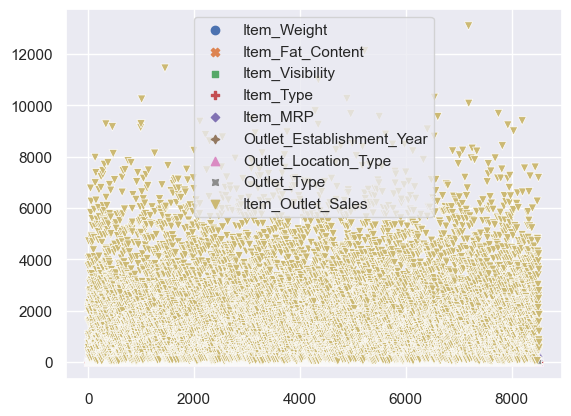

In [28]:
sns.scatterplot(dataset)
plt.show()

In [30]:
x

,Item_MRP,Item_Fat_Content,Outlet_Type
0,249.8092,0,1
1,48.2692,1,2
2,141.6180,0,1
3,182.0950,1,0
4,53.8614,0,1
...,...,...,...
8518,214.5218,0,1
8519,108.1570,1,1
8520,85.1224,0,1
8521,103.1332,1,2
